# Pre procesamiento

Como habíamos dicho es mejor pre procesar las palabras

In [1]:
from string import punctuation
import pandas as pd
import re
import unicodedata

Veamos el formato de los mensajes sin procesar

In [2]:
df = pd.read_csv('corpus.csv')
df.head(30)

,id,owner,date,hour,message
0,0,USER0,10/16/17,17:44,https://m.facebook.com/story.php?story_fbid=14...
1,0,USER1,10/16/17,17:54,Hola Te confundiste de numero
2,1,USER0,6/10/17,16:58,😂😂😂😂😂😂😂😂😂😂
3,1,USER1,6/10/17,17:43,Que es este lugar 👀
4,1,USER2,6/10/17,17:44,Qur hace este aqui
5,1,USER2,6/10/17,17:44,🤣
6,1,USER3,6/10/17,17:44,Bienvenido
7,1,USER1,6/10/17,17:50,Vengo a pasarle fotos obscenas e irme ?)
8,1,USER1,6/10/17,17:50,Pasarles
9,1,USER3,6/10/17,17:51,👀


Debido a la mala distribución de las palabras, definiremos algunas reglas de __pre-procesamiento__ que creemos que servirán en nuestra tarea. En los comentarios de cada función daremos una explicación un poco más detallada acerca de la normalización.

In [5]:
def rm_num(text):
    """
    cambiar digitos de numeros por la palabra NUM

    :text -- texto
    """
    return re.sub('(\d+[\WxX]*[^ ]*)+', 'NUM', text)

def rm_tildes(text):
    """
    remueve tildes

    :text -- texto
    """
    return ''.join((c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn'))

def rm_media(text):
    """
    remueve media

    :text -- texto
    """
    return re.sub(r'<archivo omitido>|<media omitted>', 'MEDIA', text)

def rm_repeated(text):
    """
    remueve letras que se repiten en una palabra
    Ejemplo: holaaa -> hola

    :text -- texto
    """
    return re.sub(r'([aeourshmi])\1{2,}', r'\1', text)

def rm_ok(text):
    """
    normaliza la palabra ok
    Ejemplo: oka -> ok

    :text -- texto
    """
    return re.sub('(ok)+[akis]*', 'ok', text)

def rm_ja(text):
    """
    normaliza la palabra jaja
    Ejemplo: jajajajajajaja -> ja

    :text -- texto
    """
    return re.sub('(ja[ja(js)]*)+', 'ja', text)

def rm_si(text):
    """
    normaliza la palabra si
    Ejemplo: siiiiii -> si

    :text -- texto
    """
    return re.sub('[s]+[i]+', 'si', text)

def clean_text(text):
    """
    llama a todas las funciones para normalizar texto
    Ejemplo: siiiiii -> si

    :text -- texto
    """
    return rm_num(rm_si(rm_ok(rm_ja(rm_repeated(rm_media(rm_tildes(text.lower())))))))

## ¿Cómo tratar los signos de puntuación y los emojis?

Uno de los problemas a tratar es: ¿Qué hacer con los signos de puntuación? ¿Y con los emojis? ¿Se remueven o se tratan como palabra? ¿Algunas se remueven y otras se las tiene en cuenta como contexto? **¿Cómo tratar los emojis repetidos?**

Se deberá también tener en cuenta que muchas palabras aparecen concatenadas con los signos de puntuación y los emojis, ya sea por error de tipeo, o por el uso del signo. Ej. "hola.que haces??😄"

Definimos las reglas

In [6]:
from emoji import UNICODE_EMOJI

PUNCTUATION = punctuation + '¡' + '¿'
NOT_SIGNIFICANT = re.sub('[?!\"$]+', '', PUNCTUATION)
EMOJI = u''.join(c for c in UNICODE_EMOJI)

def rm_punct(text):
    """
    Remueve signos de puntuación. Reemplaza por un espacio.
    hola.que haces??😄 -> hola que haces  😄
    """
    return re.sub('{1}{0}{1}'.format(PUNCTUATION, '[]'), ' ', text)

def rm_extra_punct(text):
    """
    Remueve signos de puntuación repetidos y agrega espacio entre ellos.
    ???!!..' -> ? ! . '
    """
    return re.sub(r'({1}{0}{2})\1*'.format(PUNCTUATION, '[', ']'), r' \1 ', text)

def rm_not_signif(text):
    """
    Remueve signos de puntuación no significativos
    ???!!!..' -> ???!!!
    """
    return re.sub('{1}{0}{1}'.format(NOT_SIGNIFICANT, '[]'), ' ', text)

def rm_extra_emojis(text):
    """
    Remueve emojis repetidos y agrega espacio entre ellos.
    hola.que haces??😄😄😄 -> hola.que haces?? 😄
    """
    return re.sub(r'({1}{0}{2})\1*'.format(EMOJI, '[', ']'), r' \1 ', text)

def rm_emojis(text):
    """
    Remueve emojis
    hola.que haces??😄 -> hola.que haces??
    """
    return ''.join(c for c in text if c not in UNICODE_EMOJI)

def rm_extra_space(text):
    """
    Remueve espacios extra
    hola   que haces? ? -> hola que haces? ?
    """
    return ' '.join(text.split())

### Tratando los signos de puntuación y los emojis como palabra
En esta etapa se tratarán todos los signos y los emojis como palabras. El preprocesamiento consiste en añadir los espacios correspondientes y eliminar repeticiones de caracteres. Ej. "hola.que haces??😄" -> "hola . que haces ? 😄"

In [7]:
def pre1(text):
    return rm_extra_space(rm_extra_emojis(rm_extra_punct(clean_text(text))))

### Removiendo signos de puntuación menos significativos
Similar a la etapa anterior, pero removiendo sólo los signos que creemos no aportan al contexto. Ej. "hola.que haces??😄" -> "hola que haces ? 😄"

In [8]:
def pre2(text):
    return rm_extra_space(rm_extra_emojis(rm_extra_punct(rm_not_signif(clean_text(text)))))

### Quitando todos los signos de puntuación
En esta etapa removemos todos los signos de puntuación y preprocesamos los emojis. Ej. "hola.que haces??😄" -> "hola que haces 😄"

In [9]:
def pre3(text):
    return rm_extra_space(rm_extra_emojis(rm_punct(clean_text(text))))

### Quitando todos los signos de puntuación y los emojis
Para mejorar aún más la distribución, probamos quitando también los emojis.

In [10]:
def pre4(text):
    return rm_extra_space(rm_punct(rm_emojis(clean_text(text))))

Guardamos los mensajes preprocesados

In [11]:
df_cleaned_pre1 = pd.DataFrame(
    [
        (id, owner, date, hour, pre1(message))
        for (id, owner, date, hour, message) in [
            row for index, row in df.iterrows()
        ]
    ],
    columns=['id', 'owner', 'date', 'hour', 'message']
)

In [12]:
df_cleaned_pre2 = pd.DataFrame(
    [
        (id, owner, date, hour, pre2(message))
        for (id, owner, date, hour, message) in [
            row for index, row in df.iterrows()
        ]
    ],
    columns=['id', 'owner', 'date', 'hour', 'message']
)

In [13]:
df_cleaned_pre3 = pd.DataFrame(
    [
        (id, owner, date, hour, pre3(message))
        for (id, owner, date, hour, message) in [
            row for index, row in df.iterrows()
        ]
    ],
    columns=['id', 'owner', 'date', 'hour', 'message']
)

In [14]:
df_cleaned_pre4 = pd.DataFrame(
    [
        (id, owner, date, hour, pre4(message))
        for (id, owner, date, hour, message) in [
            row for index, row in df.iterrows()
        ]
    ],
    columns=['id', 'owner', 'date', 'hour', 'message']
)

In [15]:
df_cleaned_pre1.head(10)

,id,owner,date,hour,message
0,0,USER0,10/16/17,17:44,https : / m . facebook . com / story . php ? s...
1,0,USER1,10/16/17,17:54,hola te confundiste de numero
2,1,USER0,6/10/17,16:58,😂
3,1,USER1,6/10/17,17:43,que es este lugar 👀
4,1,USER2,6/10/17,17:44,qur hace este aqui
5,1,USER2,6/10/17,17:44,🤣
6,1,USER3,6/10/17,17:44,bienvenido
7,1,USER1,6/10/17,17:50,vengo a pasarle fotos obscenas e irme ? )
8,1,USER1,6/10/17,17:50,pasarles
9,1,USER3,6/10/17,17:51,👀


In [16]:
df_cleaned_pre2.head(10)

,id,owner,date,hour,message
0,0,USER0,10/16/17,17:44,https m facebook com story php ? story fbid NUM
1,0,USER1,10/16/17,17:54,hola te confundiste de numero
2,1,USER0,6/10/17,16:58,😂
3,1,USER1,6/10/17,17:43,que es este lugar 👀
4,1,USER2,6/10/17,17:44,qur hace este aqui
5,1,USER2,6/10/17,17:44,🤣
6,1,USER3,6/10/17,17:44,bienvenido
7,1,USER1,6/10/17,17:50,vengo a pasarle fotos obscenas e irme ?
8,1,USER1,6/10/17,17:50,pasarles
9,1,USER3,6/10/17,17:51,👀


In [17]:
df_cleaned_pre3.head(10)

,id,owner,date,hour,message
0,0,USER0,10/16/17,17:44,https m facebook com story php story fbid NUM
1,0,USER1,10/16/17,17:54,hola te confundiste de numero
2,1,USER0,6/10/17,16:58,😂
3,1,USER1,6/10/17,17:43,que es este lugar 👀
4,1,USER2,6/10/17,17:44,qur hace este aqui
5,1,USER2,6/10/17,17:44,🤣
6,1,USER3,6/10/17,17:44,bienvenido
7,1,USER1,6/10/17,17:50,vengo a pasarle fotos obscenas e irme
8,1,USER1,6/10/17,17:50,pasarles
9,1,USER3,6/10/17,17:51,👀


In [27]:
df_cleaned_pre4.head(10)

,id,owner,date,hour,message
0,0,USER0,10/16/17,17:44,https m facebook com story php story fbid NUM
1,0,USER1,10/16/17,17:54,hola te confundiste de numero
2,1,USER0,6/10/17,16:58,
3,1,USER1,6/10/17,17:43,que es este lugar
4,1,USER2,6/10/17,17:44,qur hace este aqui
5,1,USER2,6/10/17,17:44,
6,1,USER3,6/10/17,17:44,bienvenido
7,1,USER1,6/10/17,17:50,vengo a pasarle fotos obscenas e irme
8,1,USER1,6/10/17,17:50,pasarles
9,1,USER3,6/10/17,17:51,


In [19]:
df_cleaned_pre1.to_csv(path_or_buf='preprocessed_corpus_pre1.csv')
df_cleaned_pre2.to_csv(path_or_buf='preprocessed_corpus_pre2.csv')
df_cleaned_pre3.to_csv(path_or_buf='preprocessed_corpus_pre3.csv')
df_cleaned_pre4.to_csv(path_or_buf='preprocessed_corpus_pre4.csv')

## Distribución de palabras

Veamos como sería la nueva distribución

In [20]:
from collections import Counter
from itertools import chain

counter_pre1 = Counter(chain.from_iterable(df_cleaned_pre1.message.map(lambda x: x.split())))
counter_pre2 = Counter(chain.from_iterable(df_cleaned_pre2.message.map(lambda x: x.split())))
counter_pre3 = Counter(chain.from_iterable(df_cleaned_pre3.message.map(lambda x: x.split())))
counter_pre4 = Counter(chain.from_iterable(df_cleaned_pre4.message.map(lambda x: x.split())))

In [21]:
df_distribution_pre1 = pd.DataFrame(
    data={
        'word': list(counter_pre1.keys()),
        'counter': list(counter_pre1.values())
    }
)

In [22]:
df_distribution_pre2 = pd.DataFrame(
    data={
        'word': list(counter_pre2.keys()),
        'counter': list(counter_pre2.values())
    }
)

In [23]:
df_distribution_pre3 = pd.DataFrame(
    data={
        'word': list(counter_pre3.keys()),
        'counter': list(counter_pre3.values())
    }
)

In [24]:
df_distribution_pre4 = pd.DataFrame(
    data={
        'word': list(counter_pre4.keys()),
        'counter': list(counter_pre4.values())
    }
)

In [29]:
df_distribution_pre1.to_csv(path_or_buf='distribution_pre1.csv')
df_distribution_pre2.to_csv(path_or_buf='distribution_pre2.csv')
df_distribution_pre3.to_csv(path_or_buf='distribution_pre3.csv')
df_distribution_pre4.to_csv(path_or_buf='distribution_pre4.csv')

In [28]:
df_distribution_pre1.describe()

,counter
count,46810.000000
mean,22.843239
std,412.899798
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,29668.000000


In [33]:
sum(df_distribution_pre1.counter == 1) / df_distribution_pre1.counter.count()

0.52132023071993161

In [29]:
df_distribution_pre2.describe()

,counter
count,46781.000000
mean,21.610633
std,390.335418
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,29668.000000


In [34]:
sum(df_distribution_pre2.counter == 1) / df_distribution_pre1.counter.count()

0.52132023071993161

In [31]:
df_distribution_pre3.describe()

,counter
count,46777.000000
mean,20.970905
std,378.487835
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,29668.000000


In [35]:
sum(df_distribution_pre3.counter == 1) / df_distribution_pre3.counter.count()

0.5216880090642837

In [36]:
df_distribution_pre4.head(10)

,counter,word
0,4,juntamo
1,2,puedl
2,3,pelotudaso
3,3,ruego
4,1,introd
5,1,kaleo
6,2,mostraban
7,4,pyconar
8,1,domiciliario
9,2,mortadela


In [32]:
df_distribution_pre4.describe()

,counter
count,46446.000000
mean,20.489752
std,379.083536
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,29668.000000


In [31]:
sum(df_distribution_pre4.counter == 1) / df_distribution_pre4.counter.count()

0.52885070834948111

Logramos reducir a un 53% la cantidad de palabras únicas, pero sin embargo sigue siendo bastante alta.

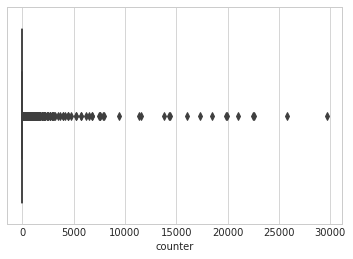

In [38]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=df_distribution_pre4["counter"])

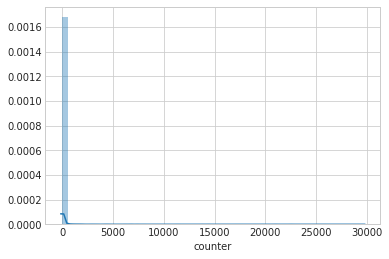

In [39]:
sns.distplot(df_distribution_pre4["counter"])

Al igual que pasaba anteriormente, los gráficos siguen sin brindar mucha información debido a la mala distribución de las palabras. Por ende, hemos decidido quedarnos con las palabras que ocurran más de 20 veces (la media).

In [51]:
new_df = df_distribution_pre4[df_distribution_pre4.counter >= 20]

__Es decir, sólo nos quedaríamos con el__

In [52]:
new_df.counter.count() / df_distribution_pre4.counter.count()

0.073784610084829699

7% de las palabras totales en la distribución

In [60]:
df_new = new_df.sort_values('counter', ascending=False).head(200).append(new_df.sort_values('counter').head(200))
df_new

,counter,word
26097,29668,que
24693,25773,de
5622,22586,a
576,22483,no
32731,21024,la
5669,19977,ja
28101,19880,el
22297,18476,y
24908,17302,NUM
34529,16066,MEDIA


Las listas de palabras tienen más sentido

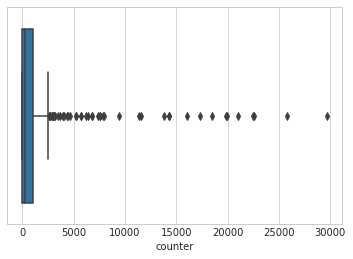

In [61]:
ax = sns.boxplot(x=df_new['counter'])

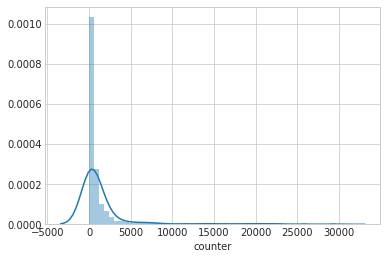

In [62]:
sns.distplot(df_new["counter"])

Por lo menos ahora se puede ver una pequeña mejora en la distribución